# Project: Wrangling and Analyzing Data


#### Data wrangling process cross through:
    1.gathering, assessing, and cleaning data 
    2.Store cleaned data set
    3.Analyzing, and visualizing
    4.Reporting
    
#### Tools to be used
    1. Jupyter Notebook
    2. Python Libraries

# Gathering Data

In [1]:
#Import all needed libraries for the project
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import time
import json
%matplotlib inline

### 1) Twitter archive data

In [2]:
# Read csv file
t_archive=pd.read_csv('twitter-archive-enhanced.csv')
t_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1255,710609963652087808,NaN,NaN,2016-03-17 23:33:12 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",I've watched this a million times and you prob...,NaN,NaN,NaN,https://vine.co/v/idaTpwH5TgU,12,10,None,None,None,None,None
651,792773781206999040,NaN,NaN,2016-10-30 17:02:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Monster. Not an actual monster tho. He...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792773781...,12,10,Monster,None,None,None,None
1612,685321586178670592,NaN,NaN,2016-01-08 04:46:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rocky. He sleeps like a psychopath. 10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685321586...,10,10,Rocky,None,None,None,None
77,877736472329191424,NaN,NaN,2017-06-22 03:54:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Aja. She was just told she's a good do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/877736472...,13,10,Aja,None,None,None,None
228,848213670039564288,8.482121e+17,4.196984e+09,2017-04-01 16:41:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Jerry just apuppologized to me. He said there ...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
1928,674045139690631169,NaN,NaN,2015-12-08 01:57:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Herd of wild dogs here. Not sure what they're ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674045139...,3,10,None,None,None,None,None
250,845098359547420673,NaN,NaN,2017-03-24 02:22:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bungalo. She uses that ...,7.733088e+17,4.196984e+09,2016-09-06 23:56:05 +0000,https://twitter.com/dog_rates/status/773308824...,12,10,Bungalo,None,None,None,None
1310,707038192327901184,NaN,NaN,2016-03-08 03:00:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kathmandu. He sees every move you make...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707038192...,10,10,Kathmandu,None,None,None,None
2301,667044094246576128,NaN,NaN,2015-11-18 18:17:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 gimme now https://t.co/QZAnwgnOMB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667044094...,12,10,None,None,None,None,None
473,816336735214911488,NaN,NaN,2017-01-03 17:33:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dudley. He found a flower and now he's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/816336735...,11,10,Dudley,None,None,None,None


### 2) Image_ Predictions Data

In [3]:
# Downloading and saving data using Requests

url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r=requests.get(url)
with open(os.path.join('image_predictions.tsv'),mode='wb') as file:
    file.write(r.content)
img_pred=pd.read_csv('image_predictions.tsv',sep='\t')
img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### 3) Tweet_Json data

The following code will not be able to run because of API application user for twitter could not be created. Alternatively, we will proceed with tweet-json file that provided by Udacity

In [5]:
#import tweepy
#from tweepy import OAuthHandler
#import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = df_1.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    #for tweet_id in tweet_ids:
      #  count += 1
      #  print(str(count) + ": " + str(tweet_id))
       # try:
       #     tweet = api.get_status(tweet_id, tweet_mode='extended')
       #     print("Success")
       #     json.dump(tweet._json, outfile)
        #    outfile.write('\n')
       # except tweepy.TweepError as e:
        #    print("Fail")
        #    fails_dict[tweet_id] = e
        #    pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [6]:
#Read json file
twt_json=pd.read_json('tweet-json.json',lines=True,encoding='utf-8')
twt_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

# Assessing

### 1) Assessing Twitter archive

In [7]:
# get sample
t_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
923,755955933503782912,NaN,NaN,2016-07-21 02:41:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a frustrated pupper attempting to escap...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/755955933...,12,10,None,None,None,pupper,None
912,757596066325864448,NaN,NaN,2016-07-25 15:19:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's another picture without a dog in it. Id...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757596066...,4,10,None,None,None,None,None
710,784826020293709826,NaN,NaN,2016-10-08 18:41:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rusty. He's going D1 for sure. Insane ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/784826020...,13,10,Rusty,None,None,None,None
1736,679722016581222400,NaN,NaN,2015-12-23 17:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mike. He is a Jordanian Frito Pilates....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679722016...,8,10,Mike,None,None,None,None
479,815745968457060357,NaN,NaN,2017-01-02 02:26:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Levi. He's a Madag...,7.914070e+17,4.196984e+09,2016-10-26 22:31:36 +0000,https://twitter.com/dog_rates/status/791406955...,12,10,Levi,None,None,None,None
2155,669603084620980224,NaN,NaN,2015-11-25 19:46:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Very human-like. Cute overbite smile *finger t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669603084...,10,10,None,None,None,None,None
1363,702932127499816960,NaN,NaN,2016-02-25 19:04:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chip. He's an Upper West Nile Pantaloo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/702932127...,6,10,Chip,None,None,None,None
666,790581949425475584,NaN,NaN,2016-10-24 15:53:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duke. He sneaks into the fridge someti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790581949...,11,10,Duke,None,None,None,None
1542,689599056876867584,NaN,NaN,2016-01-20 00:03:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see 33 dogs posing for a picture. All ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689599056...,11,10,None,None,None,None,None
1678,682047327939461121,NaN,NaN,2015-12-30 03:55:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We normally don't rate bears but this one seem...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682047327...,10,10,None,None,None,None,None


In [8]:
#twitter_archive information
t_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
#check for ununique values in tweet_id
t_archive['tweet_id'].nunique()

2356

In [10]:
#check for duplicated values
sum(t_archive.duplicated())

0

In [11]:
#check the sources
t_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [12]:
#check names data
t_archive['name'].value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
Buddy          7
Bailey         7
Daisy          7
an             7
Toby           7
Bella          6
Dave           6
Koda           6
Oscar          6
Jack           6
Leo            6
Milo           6
Rusty          6
Stanley        6
Scout          6
Jax            6
Larry          5
            ... 
Mabel          1
Alexander      1
Cuddles        1
Travis         1
Nico           1
Stella         1
Moofasa        1
such           1
Dutch          1
Butters        1
Chubbs         1
Dixie          1
Sky            1
Obi            1
Karl           1
Trigger        1
Buckley        1
Stark          1
Mya            1
Bluebert       1
Bode           1
Ace            1
Dudley         1
Clyde          1
Gilbert        1
Darla          1
Swagger        1
Pupcasso      

In [13]:
#check for unclear names
t_archive[t_archive['name'].apply(len)<3]['name'].value_counts()

a     55
Bo     9
an     7
my     1
Al     1
Mo     1
by     1
Ed     1
O      1
JD     1
Jo     1
Name: name, dtype: int64

### 2) Assessing Image_ Predictions

In [14]:
# get sample
img_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
953,705102439679201280,https://pbs.twimg.com/media/CckG63qUsAALbIr.jpg,1,collie,0.457672,True,chow,0.279101,True,Pomeranian,0.076922,True
405,673707060090052608,https://pbs.twimg.com/media/CVl8_EPWoAAcuSC.jpg,1,German_short-haired_pointer,0.935771,True,kelpie,0.022561,True,Labrador_retriever,0.008847,True
1045,712809025985978368,https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg,1,Labrador_retriever,0.868671,True,carton,0.095095,False,pug,0.007651,True
2020,880872448815771648,https://pbs.twimg.com/media/DDl8zzJW0AAisCJ.jpg,1,Pembroke,0.791416,True,Norwich_terrier,0.061393,True,Chihuahua,0.033726,True
23,666345417576210432,https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg,1,golden_retriever,0.858744,True,Chesapeake_Bay_retriever,0.054787,True,Labrador_retriever,0.014241,True
1871,844973813909606400,https://pbs.twimg.com/media/C7nzMwTV4AARz4t.jpg,1,Labrador_retriever,0.742421,True,golden_retriever,0.195218,True,Chihuahua,0.017320,True
645,681610798867845120,https://pbs.twimg.com/media/CXWRZBgWkAEHMea.jpg,1,toy_poodle,0.821704,True,miniature_poodle,0.116042,True,Yorkshire_terrier,0.014847,True
880,698635131305795584,https://pbs.twimg.com/ext_tw_video_thumb/69863...,1,Samoyed,0.158464,True,kuvasz,0.089402,True,West_Highland_white_terrier,0.025037,True
1449,776201521193218049,https://pbs.twimg.com/media/CsWfKadWEAAtmlS.jpg,1,Rottweiler,0.502228,True,black-and-tan_coonhound,0.154594,True,bloodhound,0.135176,True
1047,713177543487135744,https://pbs.twimg.com/media/CeW3MWMWQAEOMbq.jpg,1,whippet,0.734244,True,basenji,0.025948,True,Great_Dane,0.025874,True


In [15]:
# Image_ Predictions information
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
#check for ununique values in tweet_id
img_pred['tweet_id'].nunique()

2075

In [17]:
#check for duplicated values
sum(img_pred.duplicated())

0

### 3) Assessing Tweet_Json

In [18]:
# get sample
twt_json.sample(10)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
1703,NaN,NaN,2015-12-26 19:43:36,"[0, 89]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 680836369753739264, 'id_str'...",3766,False,This is Ellie. She's secretly ferocious. 12/10...,NaN,...,0.0,NaN,NaN,NaN,1513,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1728,NaN,NaN,2015-12-24 02:42:51,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 679854718617817088, 'id_str'...",3143,False,This is Bruce. He's a rare pup. Covered in Fro...,NaN,...,0.0,NaN,NaN,NaN,1402,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2309,NaN,NaN,2015-11-18 00:55:42,"[0, 107]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666781788895911936, 'id_str'...",404,False,This is a purebred Bacardi named Octaviath. Ca...,NaN,...,0.0,NaN,NaN,NaN,211,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1589,NaN,NaN,2016-01-11 17:50:18,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 686606059734216705, 'id_str'...",2071,False,"Meet Horace. He was practicing his levitation,...",NaN,...,0.0,NaN,NaN,NaN,607,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1626,NaN,NaN,2016-01-06 04:11:43,"[0, 80]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,4489,False,This pupper just got his first kiss. 12/10 he'...,NaN,...,0.0,NaN,NaN,NaN,1592,False,NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
521,NaN,NaN,2016-12-16 17:14:20,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 793962202520834048, 'id_str'...",0,False,RT @dog_rates: This is Maximus. His face is st...,NaN,...,0.0,NaN,NaN,NaN,5711,False,{'created_at': 'Wed Nov 02 23:45:19 +0000 2016...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1282,NaN,NaN,2016-03-12 02:28:06,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 708479597491388418, 'id_str'...",2768,False,Meet Bear. He's a Beneboop Cumberclap. Extreme...,NaN,...,0.0,NaN,NaN,NaN,765,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
883,NaN,NaN,2016-08-01 16:43:19,"[0, 126]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @hownottodraw: The story/person behind @dog...,NaN,...,0.0,NaN,NaN,NaN,38,False,{'created_at': 'Mon Aug 01 16:42:51 +0000 2016...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
465,NaN,NaN,2017-01-06 00:49:53,"[0, 103]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 817171279044313089, 'id_str'...",9690,False,This is Tebow. He kindly requests that you put...,NaN,...,0.0,NaN,NaN,NaN,2326,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1401,NaN,NaN,2016-02-16 02:04:04,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 699413904074665988, 'id_str'...",2258,False,Meet Miley. She's a Scandinavian Hollabackgirl...,NaN,...,0.0,NaN,NaN,NaN,688,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [19]:
# Tweet_Json information
twt_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [20]:
#check for duplicated values 
twt_json['id'].nunique()

2354

In [21]:
twt_json['retweet_count'].sort_values(ascending=False )

1037    79515
533     56625
259     56625
1077    52360
816     52360
412     48265
65      45849
448     42228
445     42228
154     37911
536     37911
164     33421
868     33421
131     32883
134     32883
1828    31989
302     31314
458     31314
1764    30742
623     27728
114     27680
168     25661
117     25661
1623    24514
653     24514
888     24319
1075    24319
449     24069
528     24069
309     24013
        ...  
965        39
883        38
284        38
2335       37
2257       37
2222       34
2258       34
610        32
100        31
408        31
187        27
1235       26
2187       25
211        23
2317       23
178        20
1521       19
185        17
2337       16
2296       14
63         10
426        10
54          7
1078        6
29          4
112         3
341         3
273         3
1293        2
290         0
Name: retweet_count, Length: 2354, dtype: int64

In [22]:
twt_json['favorite_count'].sort_values(ascending=False )

412     132810
1037    131075
65      107956
533     107015
134     106827
448      95450
114      85011
536      75639
168      75193
1077     75163
41       74423
355      73397
76       71144
22       69871
37       68152
1828     67100
153      66437
1764     61794
364      58302
458      57622
7        56848
394      56413
623      55683
122      55098
868      55016
135      54720
53       51522
55       50199
447      49960
552      49774
         ...  
158          0
159          0
596          0
602          0
668          0
194          0
193          0
601          0
924          0
600          0
599          0
184          0
598          0
597          0
181          0
179          0
681          0
595          0
594          0
381          0
593          0
385          0
670          0
676          0
170          0
909          0
588          0
164          0
585          0
484          0
Name: favorite_count, Length: 2354, dtype: int64

## Assessment of  Tidiness
    1. Data frames of img_pred and twt_json must be combined into twitter_archive data frame
    2. The columns of doggo, floofer, pupper, and puppo must be in a column 

## Assessment of Quality 
    
    1. Change data type of some columns
    2. Rename some columns and  delete unnecessary columns
    3. Correct names started with lower case
    4. Remove weird names 
    5. Remove retweets 
    6. Correct some values of Rating Numerator
    7. Calculate Rating_Scrore
    8. delete unnecessary columns column from json file

# Cleaning Data

## A. Tidiness Issues

### Tidiness issue # 1

Define:

Data frames of img_pred and twt_json must be combined into twitter_archive data frame

In [23]:
# Code:
# Make copy of all data frames
ta_cdf=t_archive.copy()
ip_cdf=img_pred.copy()
tj_cdf=twt_json.copy()

In [24]:
#Create function to merage two dataframe to gather
def Merge(df1,df2,id1,id2):
    twitter_archive=pd.merge(left=df1,right=df2,left_on=id1,right_on=id2,how='inner')
    return twitter_archive

# Call merge function to combile data farmes
ta_cdf=Merge(ta_cdf,tj_cdf,'tweet_id','id')
ta_cdf=Merge(ta_cdf,ip_cdf,'tweet_id','tweet_id')

##### Test:

In [25]:
ta_cdf.sample(5)

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
551,788070120937619456,NaN,NaN,2016-10-17 17:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo and Ty. Bo eats pape...,7.610045e+17,4.196984e+09,2016-08-04 01:03:17 +0000,https://twitter.com/dog_rates/status/761004547...,...,1,golden_retriever,0.735163,True,Sussex_spaniel,0.064897,True,Labrador_retriever,0.047704,True
1901,668994913074286592,NaN,NaN,2015-11-24 03:29:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Two gorgeous pups here. Both have cute fake ho...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668994913...,...,1,hog,0.113789,False,English_springer,0.089763,True,French_bulldog,0.082186,True
393,813800681631023104,NaN,NaN,2016-12-27 17:36:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sky. She's learning how to roll her R'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813800681...,...,1,malamute,0.501159,True,Siberian_husky,0.228792,True,Eskimo_dog,0.200388,True
1252,692919143163629568,NaN,NaN,2016-01-29 03:56:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please only send in dogs. Don't submit other t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692919143...,...,1,Saint_Bernard,0.612635,True,English_springer,0.269744,True,boxer,0.048666,True
440,805932879469572096,NaN,NaN,2016-12-06 00:32:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Major. He put on a tie for his first r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/805932879...,...,1,Norwegian_elkhound,0.657967,True,keeshond,0.319136,True,Leonberg,0.007947,True


In [26]:
ta_cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 59 columns):
tweet_id                         2073 non-null int64
in_reply_to_status_id_x          23 non-null float64
in_reply_to_user_id_x            23 non-null float64
timestamp                        2073 non-null object
source_x                         2073 non-null object
text                             2073 non-null object
retweeted_status_id              79 non-null float64
retweeted_status_user_id         79 non-null float64
retweeted_status_timestamp       79 non-null object
expanded_urls                    2073 non-null object
rating_numerator                 2073 non-null int64
rating_denominator               2073 non-null int64
name                             2073 non-null object
doggo                            2073 non-null object
floofer                          2073 non-null object
pupper                           2073 non-null object
puppo                            2073 

### Tidiness issue # 2

##### Define:

The columns of doggo, floofer, pupper, and puppo are observations. They must be inside one column dog stage

##### Code:

In [27]:
ta_cdf.doggo.replace('None', '', inplace=True) and df.doggo.replace(np.NaN, '', inplace=True)
ta_cdf.pupper.replace('None', '', inplace=True) and df.doggo.replace(np.NaN, '', inplace=True)
ta_cdf.puppo.replace('None', '', inplace=True) and df.doggo.replace(np.NaN, '', inplace=True)
ta_cdf.floofer.replace('None', '', inplace=True) and df.doggo.replace(np.NaN, '', inplace=True)

In [28]:
ta_cdf['dog_stage'] = ta_cdf.doggo + ta_cdf.pupper + ta_cdf.puppo + ta_cdf.floofer
#To fix the combined name
ta_cdf.loc[ta_cdf.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
ta_cdf.loc[ta_cdf.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
ta_cdf.loc[ta_cdf.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [29]:
ta_cdf['dog_stage'].value_counts()

                  1753
pupper             210
doggo               67
puppo               23
doggo, pupper       11
floofer              7
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

In [30]:
print(ta_cdf.dog_stage.value_counts())
print(len(ta_cdf))

                  1753
pupper             210
doggo               67
puppo               23
doggo, pupper       11
floofer              7
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64
2073


##### Test:

In [31]:
ta_cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 60 columns):
tweet_id                         2073 non-null int64
in_reply_to_status_id_x          23 non-null float64
in_reply_to_user_id_x            23 non-null float64
timestamp                        2073 non-null object
source_x                         2073 non-null object
text                             2073 non-null object
retweeted_status_id              79 non-null float64
retweeted_status_user_id         79 non-null float64
retweeted_status_timestamp       79 non-null object
expanded_urls                    2073 non-null object
rating_numerator                 2073 non-null int64
rating_denominator               2073 non-null int64
name                             2073 non-null object
doggo                            2073 non-null object
floofer                          2073 non-null object
pupper                           2073 non-null object
puppo                            2073 

## B. Quality Issues

###  Quality Issue # 1

##### Define:

Change data type of some columns

###### Code:

In [32]:
ta_cdf['tweet_id'] = ta_cdf['tweet_id'].astype(str)
ta_cdf['timestamp'] = pd.to_datetime(ta_cdf['timestamp'])
ta_cdf['dog_stage'] = ta_cdf['dog_stage'].astype('category')
ta_cdf['rating_numerator'] = ta_cdf['rating_numerator'].astype(float)
ta_cdf['rating_denominator'] = ta_cdf['rating_denominator'].astype(float)

##### Test: 

In [33]:
ta_cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 60 columns):
tweet_id                         2073 non-null object
in_reply_to_status_id_x          23 non-null float64
in_reply_to_user_id_x            23 non-null float64
timestamp                        2073 non-null datetime64[ns, UTC]
source_x                         2073 non-null object
text                             2073 non-null object
retweeted_status_id              79 non-null float64
retweeted_status_user_id         79 non-null float64
retweeted_status_timestamp       79 non-null object
expanded_urls                    2073 non-null object
rating_numerator                 2073 non-null float64
rating_denominator               2073 non-null float64
name                             2073 non-null object
doggo                            2073 non-null object
floofer                          2073 non-null object
pupper                           2073 non-null object
puppo               

###  Quality Issue # 2

##### Define:

Rename some columns and delete unnecessary columns

##### Code:

In [34]:
# Rename columns
ta_cdf.rename(columns={'source_x': 'source', 'retweet_count': 'retweet', 'favorite_count': 'favorite','rating_numerator': 'numerator', 'rating_denominator': 'denominator'}, inplace=True)

# Drop unnecessary columns
ta_cdf.drop(['in_reply_to_status_id_x','in_reply_to_user_id_x',], axis=1, inplace=True)

##### Test:

In [35]:
ta_cdf

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,numerator,denominator,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,...,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,
6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,...,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,
7,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,...,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,
8,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,...,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,...,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,doggo


###  Quality Issue # 3

##### Define:

 Correct names started with lower case

##### Code:

In [36]:
# /check for names that started with lower case and save them into array
lowercase_list=[]
for name in ta_cdf['name']:
    if name[0].islower():
        lowercase_list.append(name)
lowercase_list=np.array(lowercase_list)
print("Number of names that started with lower case: ", lowercase_list.shape[0])
lowercase_list=np.unique(lowercase_list)
lowercase_list

Number of names that started with lower case:  100


array(['a', 'actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly',
       'infuriating', 'just', 'light', 'my', 'not', 'officially', 'one',
       'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very'],
      dtype='<U12')

In [37]:
lowercase_list.shape[0]

22

In [38]:
#Replace names which started with lower case with NaN
ta_cdf['name']=ta_cdf['name'].replace(lowercase_list,np.nan)

##### Test: 

In [39]:
ta_cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 58 columns):
tweet_id                         2073 non-null object
timestamp                        2073 non-null datetime64[ns, UTC]
source                           2073 non-null object
text                             2073 non-null object
retweeted_status_id              79 non-null float64
retweeted_status_user_id         79 non-null float64
retweeted_status_timestamp       79 non-null object
expanded_urls                    2073 non-null object
numerator                        2073 non-null float64
denominator                      2073 non-null float64
name                             1973 non-null object
doggo                            2073 non-null object
floofer                          2073 non-null object
pupper                           2073 non-null object
puppo                            2073 non-null object
contributors                     0 non-null float64
coordinates         

###  Quality Issue # 4

##### Define:

Remove weird names and replace it with NaN

##### Code:

In [40]:
#check for weird names
ta_cdf['name']=ta_cdf['name'].astype(str)
weird_names=ta_cdf[ta_cdf['name'].apply(len)<3]['name']
weird_names=np.array(weird_names)
weird_names

array(['Mo', 'Bo', 'Bo', 'Bo', 'Bo', 'Bo', 'O', 'Al', 'Bo', 'Bo', 'Bo',
       'Ed', 'JD', 'Jo'], dtype=object)

In [41]:
# replace weird names with nan
ta_cdf['name']=ta_cdf['name'].replace(weird_names,np.nan)

__Test__

In [42]:
ta_cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 58 columns):
tweet_id                         2073 non-null object
timestamp                        2073 non-null datetime64[ns, UTC]
source                           2073 non-null object
text                             2073 non-null object
retweeted_status_id              79 non-null float64
retweeted_status_user_id         79 non-null float64
retweeted_status_timestamp       79 non-null object
expanded_urls                    2073 non-null object
numerator                        2073 non-null float64
denominator                      2073 non-null float64
name                             2059 non-null object
doggo                            2073 non-null object
floofer                          2073 non-null object
pupper                           2073 non-null object
puppo                            2073 non-null object
contributors                     0 non-null float64
coordinates         

###  Quality Issue # 5

##### Define:

Remove retweets and replace it with Nan, then delete related unnecessary columns

##### Code:

In [43]:
# Keep rows where 'retweeted_status_id' is NaN
ta_cdf = ta_cdf[np.isnan(ta_cdf.retweeted_status_id)]

# delete related and unnecessary columns
d=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
ta_cdf.drop(d,1,inplace=True)

C:\Users\Armani\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


##### Test

In [44]:
ta_cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 55 columns):
tweet_id                         1994 non-null object
timestamp                        1994 non-null datetime64[ns, UTC]
source                           1994 non-null object
text                             1994 non-null object
expanded_urls                    1994 non-null object
numerator                        1994 non-null float64
denominator                      1994 non-null float64
name                             1982 non-null object
doggo                            1994 non-null object
floofer                          1994 non-null object
pupper                           1994 non-null object
puppo                            1994 non-null object
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       1994 non-null datetime64[ns]
display_text_range               1994 non-null object
entities  

### Quality Issue # 6

##### Define:

Correct some values of Rating Numerator

##### Code:

In [45]:
ta_cdf[ta_cdf['text'].str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\Armani\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,timestamp,source,text,expanded_urls,numerator,denominator,name,doggo,floofer,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
40,883482846933004288,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5.0,10.0,Bella,,,...,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,
558,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75.0,10.0,Logan,,,...,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True,
614,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27.0,10.0,Sophie,,,...,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,pupper
1451,680494726643068929,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26.0,10.0,None,,,...,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,


In [46]:
ta_cdf.loc[(ta_cdf['tweet_id'] == 883482846933004288) & (ta_cdf['numerator'] == 5), ['numerator']] = 13.5
ta_cdf.loc[(ta_cdf['tweet_id'] == 786709082849828864) & (ta_cdf['numerator'] == 75), ['numerator']] = 9.75
ta_cdf.loc[(ta_cdf['tweet_id'] == 778027034220126208) & (ta_cdf['numerator'] == 27), ['numerator']] = 11.27
ta_cdf.loc[(ta_cdf['tweet_id'] == 680494726643068929) & (ta_cdf['numerator'] == 26), ['numerator']] = 11.26

C:\Users\Armani\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


##### Test:

In [47]:
ta_cdf[ta_cdf['text'].str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\Armani\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,timestamp,source,text,expanded_urls,numerator,denominator,name,doggo,floofer,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
40,883482846933004288,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5.0,10.0,Bella,,,...,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,
558,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75.0,10.0,Logan,,,...,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True,
614,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27.0,10.0,Sophie,,,...,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,pupper
1451,680494726643068929,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26.0,10.0,None,,,...,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,


###  Quality Issue # 7

##### Define:

Calculate Rating_Score

##### Code:

In [48]:
ta_cdf['rating_Score']=ta_cdf['numerator']/ta_cdf['denominator']
ta_cdf['rating_Score'].describe()

C:\Users\Armani\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


count    1994.000000
mean        1.169249
std         4.067071
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating_Score, dtype: float64

In [49]:
# Define Outlier
ta_cdf[ta_cdf['rating_Score']>10]


,tweet_id,timestamp,source,text,expanded_urls,numerator,denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating_Score
802,749981277374128128,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10.0,Atticus,,,...,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,,177.6
1795,670842764863651840,2015-11-29 05:52:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420.0,10.0,None,,,...,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False,,42.0


In [50]:
# Replace Outlier with NaN
ta_cdf[ta_cdf['rating_Score']>10]=np.nan

C:\Users\Armani\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


##### Test:

In [51]:
ta_cdf[ta_cdf['rating_Score']>10]

,tweet_id,timestamp,source,text,expanded_urls,numerator,denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating_Score


In [52]:
ta_cdf.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,numerator,denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating_Score
1375,684538444857667585,2016-01-06 00:54:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After watching this video, we've determined th...",https://twitter.com/dog_rates/status/684538444...,12.0,10.0,None,,,...,0.702583,1.0,Siamese_cat,0.068218,0.0,macaque,0.043325,0.0,,1.2
907,735274964362878976,2016-05-25 01:03:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in your...,https://twitter.com/dog_rates/status/735274964...,11.0,10.0,None,,,...,0.944692,0.0,four-poster,0.007942,0.0,quilt,0.006302,0.0,,1.1
56,880095782870896641,2017-06-28 16:09:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Please don't send in photos without dogs in th...,https://twitter.com/dog_rates/status/880095782...,11.0,10.0,None,,,...,0.120298,1.0,Rhodesian_ridgeback,0.106395,1.0,beagle,0.106073,1.0,,1.1
1564,676098748976615425,2015-12-13 17:57:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Extremely rare pup here. Very religious. Alway...,https://twitter.com/dog_rates/status/676098748...,3.0,10.0,None,,,...,0.162179,0.0,sandal,0.129086,0.0,purse,0.081412,0.0,,0.3
385,815390420867969024,2017-01-01 02:53:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy New Year from the squad! 13/10 for all h...,https://twitter.com/dog_rates/status/815390420...,13.0,10.0,None,,,...,0.279846,0.0,toyshop,0.091429,0.0,paper_towel,0.046147,0.0,,1.3


###  Quality Issue # 8

##### Define:

delete unnecessary columns column from json file, but keep id,favorite_count, retweet_count

##### Code:

In [53]:
d_json=['id','created_at','id_str','full_text','truncated','display_text_range','entities','extended_entities','in_reply_to_status_id_y'
                   ,'in_reply_to_status_id_str','in_reply_to_user_id_y','in_reply_to_user_id_str','in_reply_to_screen_name'
                   ,'user','geo','coordinates','place','contributors','is_quote_status','favorited','retweeted','possibly_sensitive'
                    ,'possibly_sensitive_appealable','source_y','lang','retweeted_status','quoted_status_id','quoted_status_id_str','quoted_status']


ta_cdf.drop(d_json,1,inplace=True)

##### Test:

In [54]:
ta_cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id         1992 non-null object
timestamp        1992 non-null datetime64[ns, UTC]
source           1992 non-null object
text             1992 non-null object
expanded_urls    1992 non-null object
numerator        1992 non-null float64
denominator      1992 non-null float64
name             1980 non-null object
doggo            1992 non-null object
floofer          1992 non-null object
pupper           1992 non-null object
puppo            1992 non-null object
favorite         1992 non-null float64
retweet          1992 non-null float64
jpg_url          1992 non-null object
img_num          1992 non-null float64
p1               1992 non-null object
p1_conf          1992 non-null float64
p1_dog           1992 non-null float64
p2               1992 non-null object
p2_conf          1992 non-null float64
p2_dog           1992 non-null float64
p3               1992 non-null obje

# Save Dataset 

In [55]:
ta_cdf.to_csv('twitter_archive.csv',index=False)

In [56]:
twitter_archive=pd.read_csv('twitter_archive.csv')

In [57]:
twitter_archive.head()

,tweet_id,timestamp,source,text,expanded_urls,numerator,denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating_Score
0,8.924206e+17,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,...,0.097049,0.0,bagel,0.085851,0.0,banana,0.076110,0.0,NaN,1.3
1,8.921774e+17,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,NaN,...,0.323581,1.0,Pekinese,0.090647,1.0,papillon,0.068957,1.0,NaN,1.3
2,8.918152e+17,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,NaN,...,0.716012,1.0,malamute,0.078253,1.0,kelpie,0.031379,1.0,NaN,1.2
3,8.916896e+17,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,NaN,...,0.170278,0.0,Labrador_retriever,0.168086,1.0,spatula,0.040836,0.0,NaN,1.3
4,8.913276e+17,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,NaN,...,0.555712,1.0,English_springer,0.225770,1.0,German_short-haired_pointer,0.175219,1.0,NaN,1.2


In [58]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 27 columns):
tweet_id         1992 non-null float64
timestamp        1992 non-null object
source           1992 non-null object
text             1992 non-null object
expanded_urls    1992 non-null object
numerator        1992 non-null float64
denominator      1992 non-null float64
name             1882 non-null object
doggo            74 non-null object
floofer          8 non-null object
pupper           212 non-null object
puppo            23 non-null object
favorite         1992 non-null float64
retweet          1992 non-null float64
jpg_url          1992 non-null object
img_num          1992 non-null float64
p1               1992 non-null object
p1_conf          1992 non-null float64
p1_dog           1992 non-null float64
p2               1992 non-null object
p2_conf          1992 non-null float64
p2_dog           1992 non-null float64
p3               1992 non-null object
p3_conf          

#  Analyzing, and Visualizing Data for this Project

### Analysis of the correlation between columns favorite and retweet 

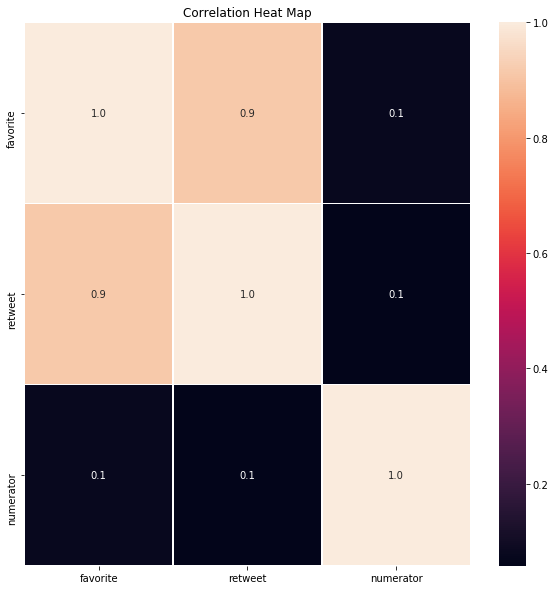

In [59]:
# Draw heat map using seasborn to show correlation between columns
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(ta_cdf[['source', 'favorite','retweet',
                'numerator']].corr(), annot=True, linewidths=.5, fmt= '.1f')

plt.title('Correlation Heat Map');

### Insights:
1. Favorites vs Retweet records the most strong relationship in our dataset 
2. The relationship between Favorites and Retweet is positive relationship 
3. Numerator factor has no effect on the other variables

## Visualization of positive relationship between favorite and retweet

C:\Users\Armani\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


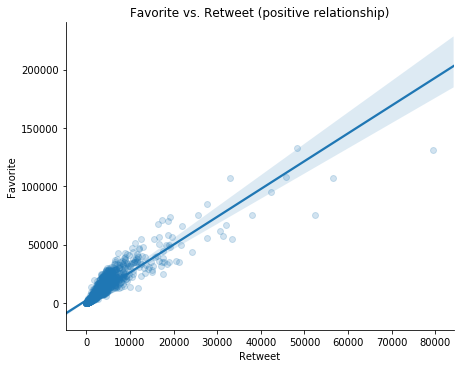

In [60]:
#use of Plot scatterplot to show relationship between favorite and retweet
sns.lmplot(x="retweet", 
           y="favorite", 
           data=ta_cdf,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favorite vs. Retweet (positive relationship)')
plt.xlabel('Retweet')
plt.ylabel('Favorite');

## Categories of dog stages

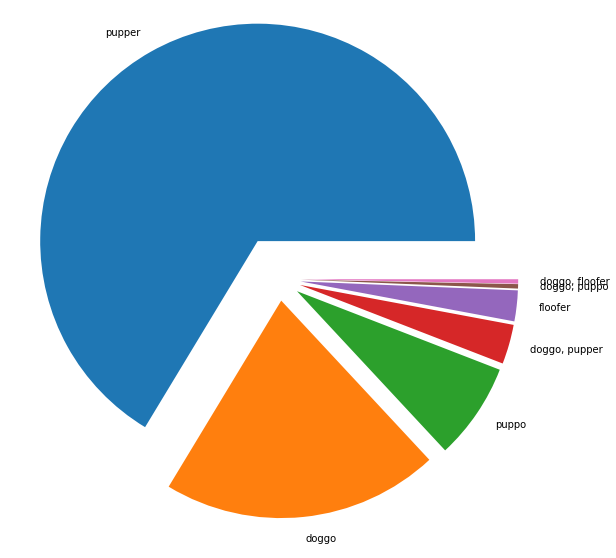

In [61]:
# Draw pie chart to show categories of Dog stages in our data set
dogs_counts = list(ta_cdf[ta_cdf['dog_stage'] != '']['dog_stage'].value_counts())[0:7]
dog_stages = ta_cdf[ta_cdf['dog_stage'] != '']['dog_stage'].value_counts().index.tolist()[0:7]
explode = (0.2, 0.1, 0.1, 0.1,0.1,0.1,0.1) 
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(dogs_counts, explode = explode, labels = dog_stages);